In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d = pd.read_csv('df_to_machine_learning.csv', index_col=False).drop(['uid','voteDate'], axis=1)

In [3]:
d
# Fréquence de remplissage : somme de la différence entre deux activités OK
# nb like/dislike commentaire personne absente ? oui / non OK
# évolution longueur commentaire : croissant / égal / décroissant : pente : OK
# biais du pb : nb vote == longévité, partir != mécontent 
# précision / rappel / courbe roc / matrice confusion OK
# graph stillExists avec les autres features.

,numVotes,stillExists,liked,disliked,liked_churned_people,vote,Happiness,Activity,likes,dislikes,txt_len
0,4,True,6,0,0,2.500000,-0.000000,37,7.500000,1.000000,114.500000
1,72,True,60,12,1,2.250000,-0.000805,406,5.428571,4.785714,59.571429
2,14,False,1,0,0,3.142857,0.006202,66,6.000000,0.000000,92.000000
3,14,False,1,0,0,3.142857,0.006202,66,6.000000,0.000000,92.000000
4,22,True,6,5,0,3.454545,-0.001876,378,3.333333,0.888889,85.555556
...,...,...,...,...,...,...,...,...,...,...,...
2585,4,True,11,0,0,2.750000,-0.257143,4,1.000000,0.500000,56.500000
2586,3,True,8,4,0,3.666667,0.285714,3,10.333333,0.000000,115.333333
2587,5,True,28,8,0,2.600000,-0.600000,4,10.666667,5.666667,87.000000
2588,1,True,1,0,0,4.000000,0.000000,0,15.000000,0.000000,386.000000


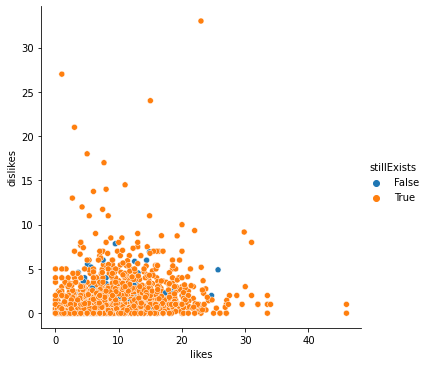

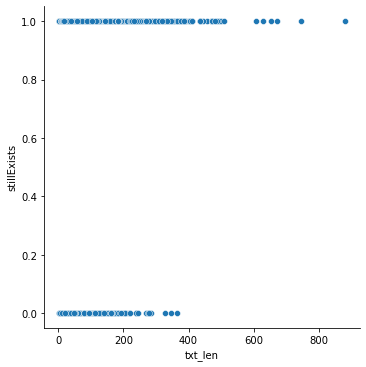

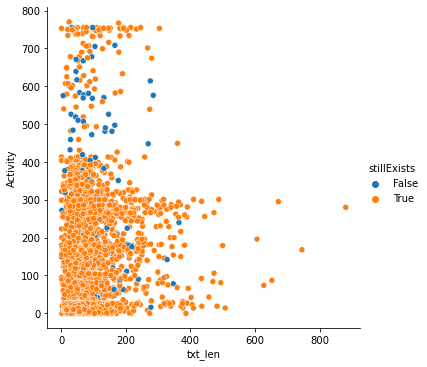

In [4]:
sns.relplot(data=d,x="likes", y="dislikes", hue='stillExists')
sns.relplot(data=d,x="txt_len", y="stillExists")
sns.relplot(data=d,x="txt_len", y='Activity', hue="stillExists")

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


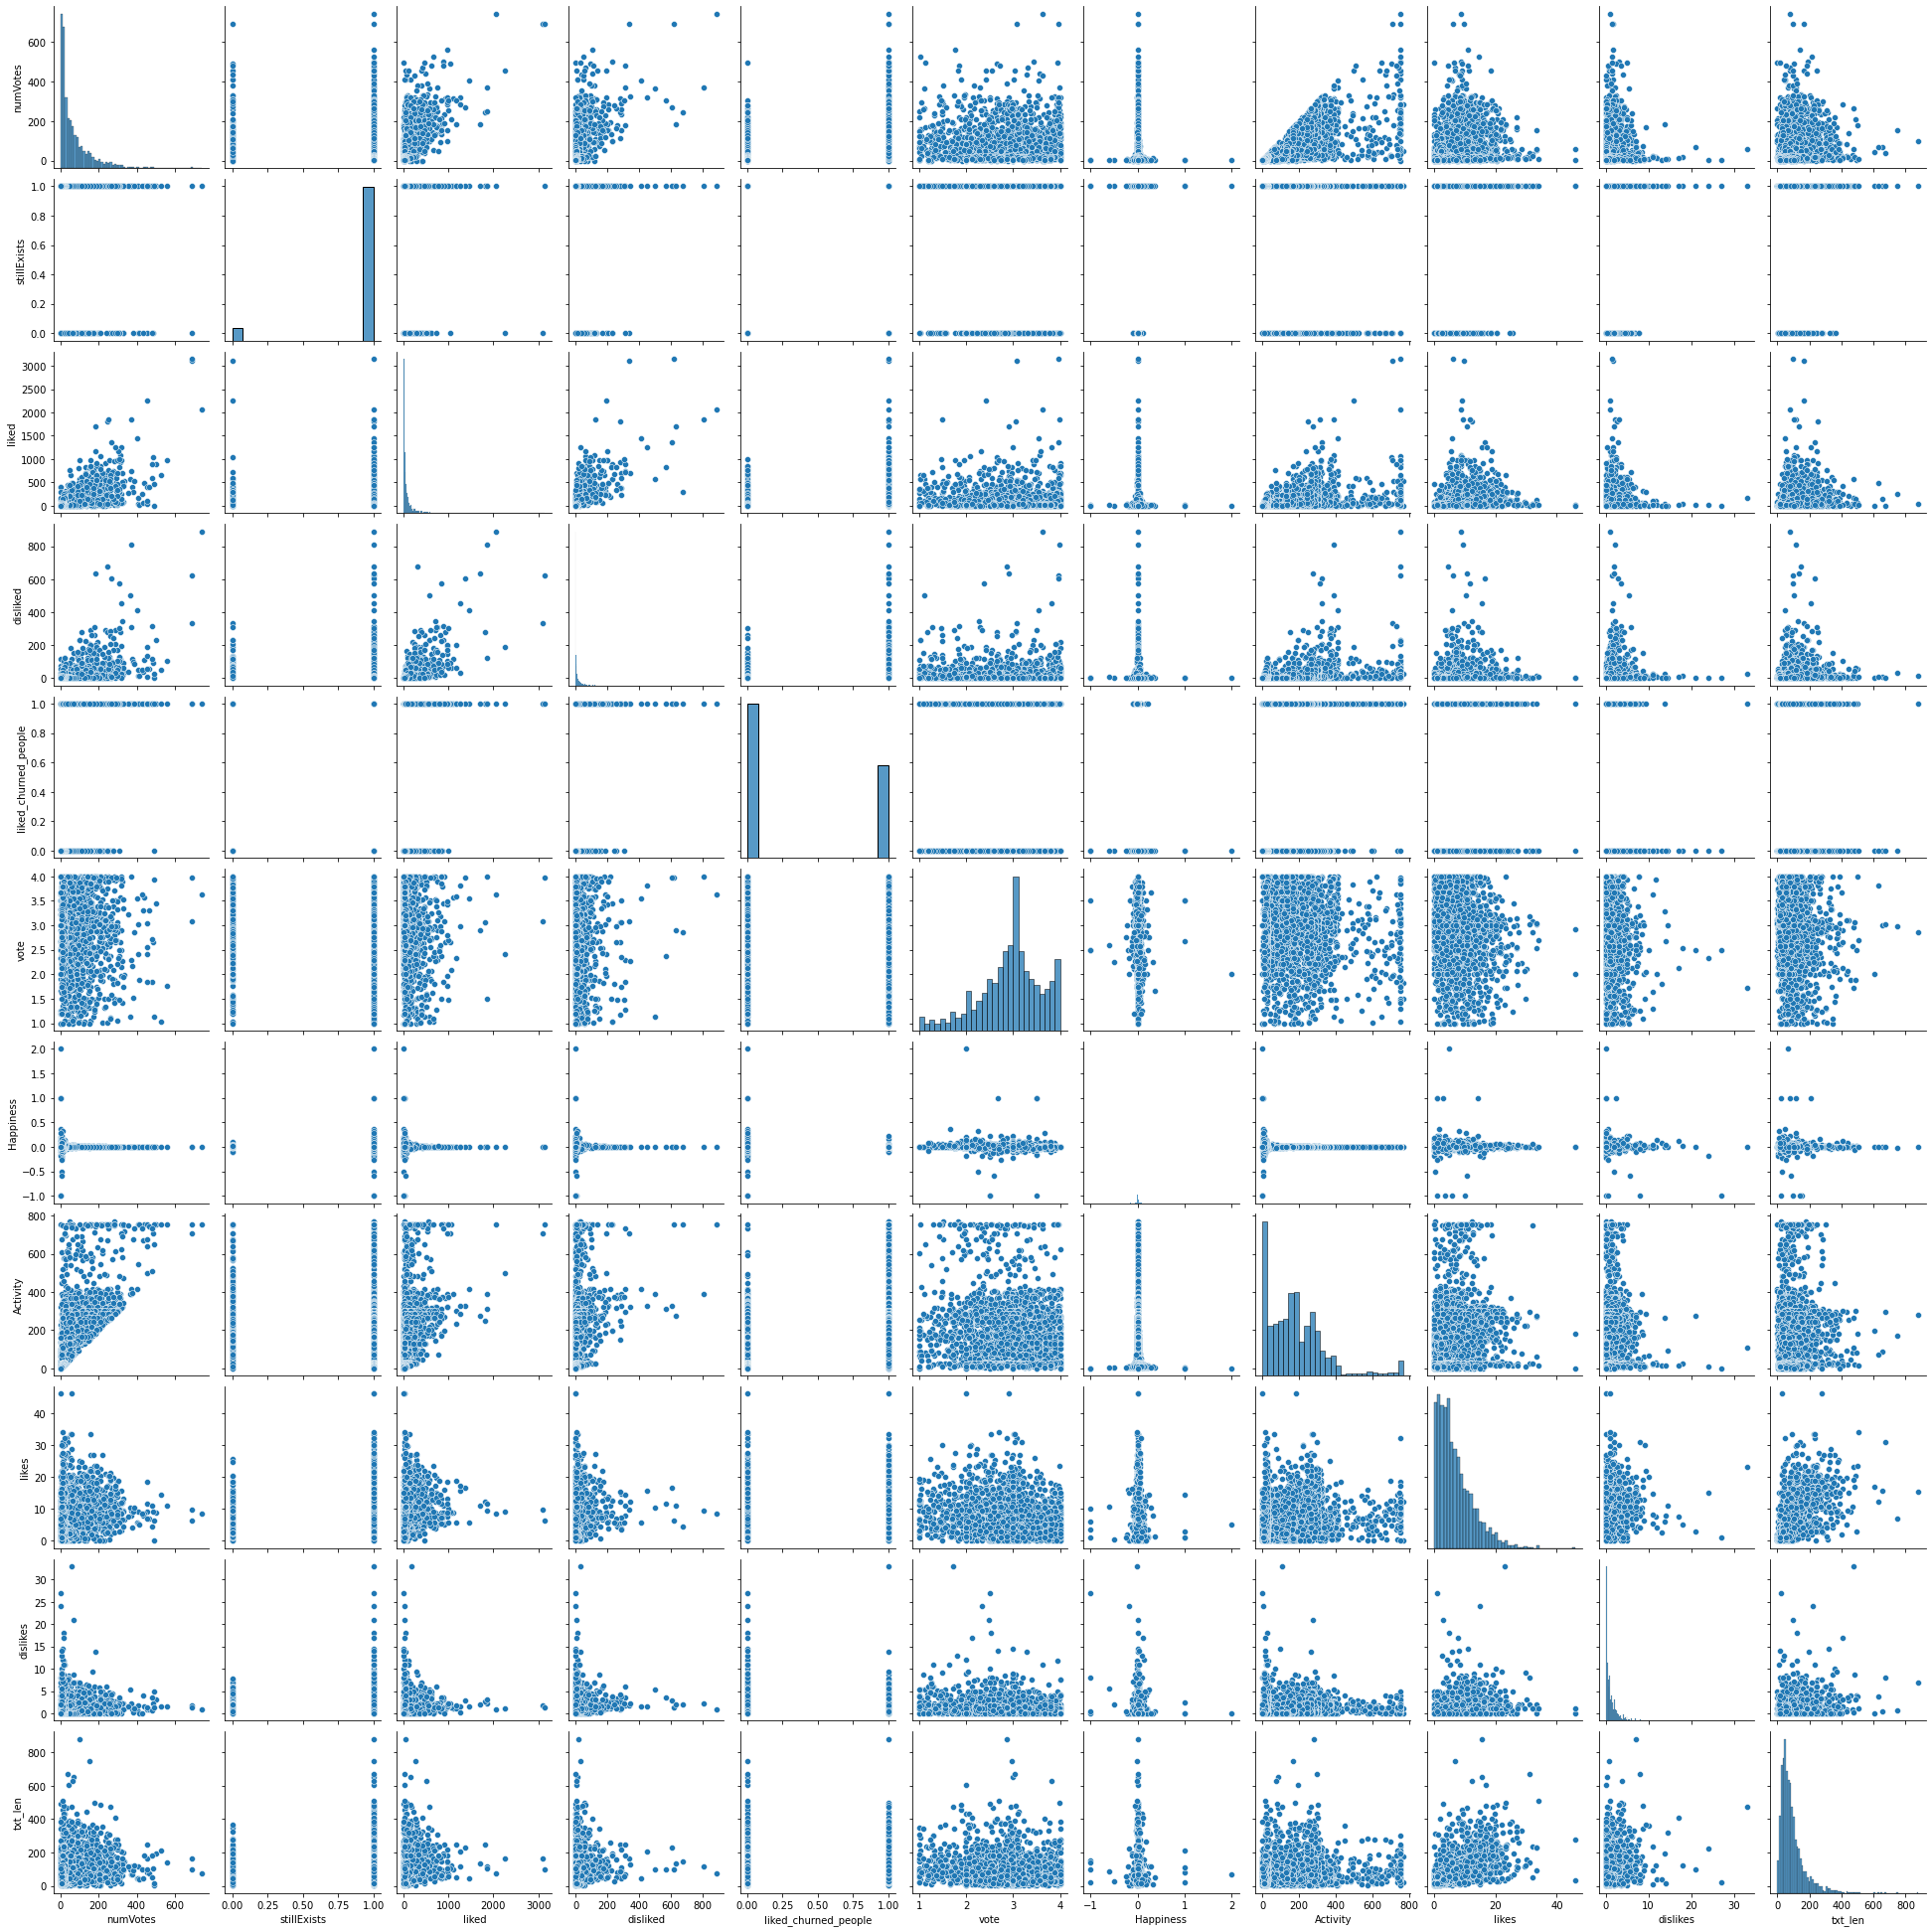

In [5]:
sns.pairplot(d)

<AxesSubplot:>

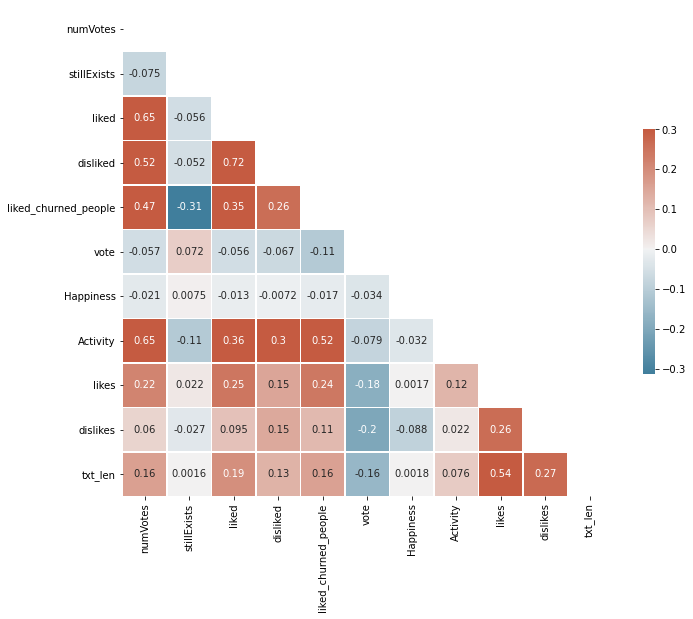

In [6]:
# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [7]:
from sklearn.model_selection import train_test_split


X = d.drop(columns=['stillExists'])
y = d[['stillExists']]

# Your code here:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=10, random_state=0).fit(X_train, y_train)
score = clf.score(X_train, y_train)
score

In [9]:
from sklearn.neighbors import KNeighborsClassifier


neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

/home/osboxes/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [10]:
neigh.score(X_train, y_train)

0.944980694980695

In [11]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

/home/osboxes/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9232625482625483

In [12]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9343629343629344

In [13]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[  0,  34],
       [  0, 484]])

In [14]:
y_test.value_counts()

stillExists
True           484
False           34
dtype: int64

In [15]:
np.unique(y_pred, return_counts=True)

(array([ True]), array([518]))

## The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

## The best value is 1 and the worst value is 0.

In [16]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred, average='macro')

0.5

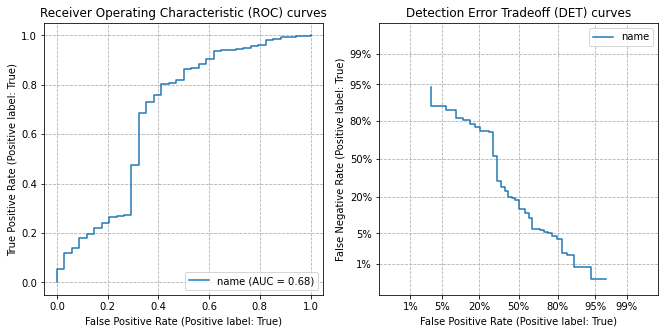

In [17]:
from sklearn.metrics import plot_det_curve
from sklearn.metrics import plot_roc_curve

fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))

plot_roc_curve(clf, X_test, y_test, ax=ax_roc, name='name')
plot_det_curve(clf, X_test, y_test, ax=ax_det, name="name")


ax_roc.set_title('Receiver Operating Characteristic (ROC) curves')
ax_det.set_title('Detection Error Tradeoff (DET) curves')

ax_roc.grid(linestyle='--')
ax_det.grid(linestyle='--')

plt.legend()
plt.show()

In [18]:
from sklearn.datasets import load_iris
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=0).fit(X_train, y_train)
gpc.score(X_train, y_train)

/home/osboxes/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9218146718146718

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
iris = load_iris()
cross_val_score(clf, X_train, y_train, cv=10)

array([0.89903846, 0.88461538, 0.88888889, 0.89855072, 0.88888889,
       0.87922705, 0.89855072, 0.89371981, 0.92753623, 0.89371981])

In [20]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

<ipython-input-20-34e547ad0001>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


0.9227799227799228

In [21]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
AdaBoostClassifier(n_estimators=100, random_state=0)
clf.score(X_train, y_train)

/home/osboxes/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9493243243243243

In [22]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

/home/osboxes/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7794401544401545

In [23]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

/home/osboxes/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7833011583011583